   year  month  day  week  temp_2  temp_1  average  actual  forecast_noaa  \
0  2016      1    1   Fri      45      45     45.6      45             43   
1  2016      1    2   Sat      44      45     45.7      44             41   
2  2016      1    3   Sun      45      44     45.8      41             43   
3  2016      1    4   Mon      44      41     45.9      40             44   
4  2016      1    5  Tues      41      40     46.0      44             46   

   forecast_acc  forecast_under  friend  
0            50              44      29  
1            50              44      61  
2            46              47      56  
3            48              46      53  
4            46              46      41  
         year       month         day      temp_2      temp_1     average  \
count   348.0  348.000000  348.000000  348.000000  348.000000  348.000000   
mean   2016.0    6.477011   15.514368   62.652299   62.701149   59.760632   
std       0.0    3.498380    8.772982   12.165398   12

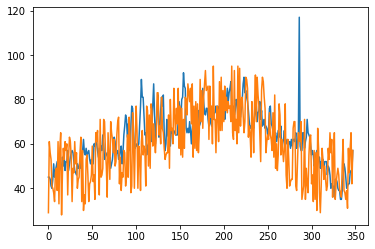

In [33]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load data
df_temp=pd.read_csv('temps.csv')

print(df_temp.head(5))
print(df_temp.describe())

plt.figure()
plt.plot(df_temp["temp_1"])
plt.plot(df_temp["friend"])

# change to one-hot encoded
df_temp = pd.get_dummies(df_temp)



In [34]:
# Remove the actual data from the set to validate against
values = np.array(df_temp["actual"])
df_temp=df_temp.drop('actual',axis=1)
feature_names = np.array(df_temp.columns,dtype=str)

features=np.array(df_temp)
print(feature_names)

['year' 'month' 'day' 'temp_2' 'temp_1' 'average' 'forecast_noaa'
 'forecast_acc' 'forecast_under' 'friend' 'week_Fri' 'week_Mon' 'week_Sat'
 'week_Sun' 'week_Thurs' 'week_Tues' 'week_Wed']


In [35]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(features, values, test_size = 0.25, random_state = 42)

In [37]:
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_X.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (261, 17)
Training Labels Shape: (261,)
Testing Features Shape: (87, 17)
Testing Labels Shape: (87,)


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf_model = RandomForestRegressor(n_estimators=1000,random_state=42)
rf_model.fit(train_X,train_y)
prediction = rf_model.predict(test_X)

mae = mean_absolute_error(prediction,test_y)

print("Mean Absolute Error: {:,.4f}".format(mae))


Mean Absolute Error: 3.8732
